<a href="https://colab.research.google.com/github/umanguss/data_science_py/blob/main/usproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [53]:
data = pd.read_csv('eng.1.csv')
data.head()

,Round,Date,Team 1,FT,Team 2
0,1,Sat Sep 12 2020,Fulham,0–3,Arsenal
1,1,Sat Sep 12 2020,Crystal Palace,1–0,Southampton
2,1,Sat Sep 12 2020,Liverpool,4–3,Leeds United
3,1,Sat Sep 12 2020,West Ham,0–2,Newcastle Utd
4,1,Sun Sep 13 2020,West Brom,0–3,Leicester City


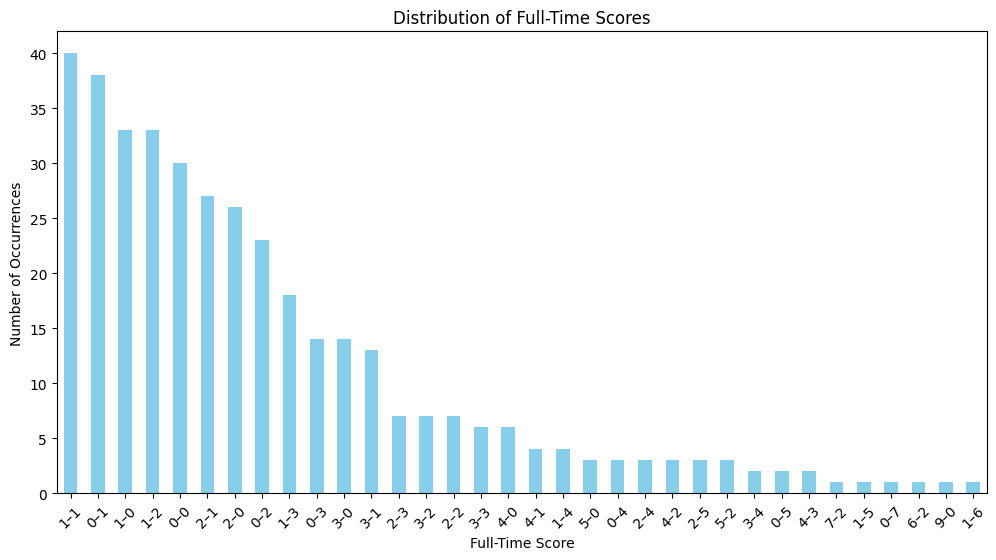

In [54]:
import matplotlib.pyplot as plt

# Count occurrences of each full-time score
score_counts = data['FT'].value_counts()

# Plot the distribution of full-time scores
plt.figure(figsize=(12, 6))
score_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Full-Time Scores')
plt.xlabel('Full-Time Score')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45)
plt.show()


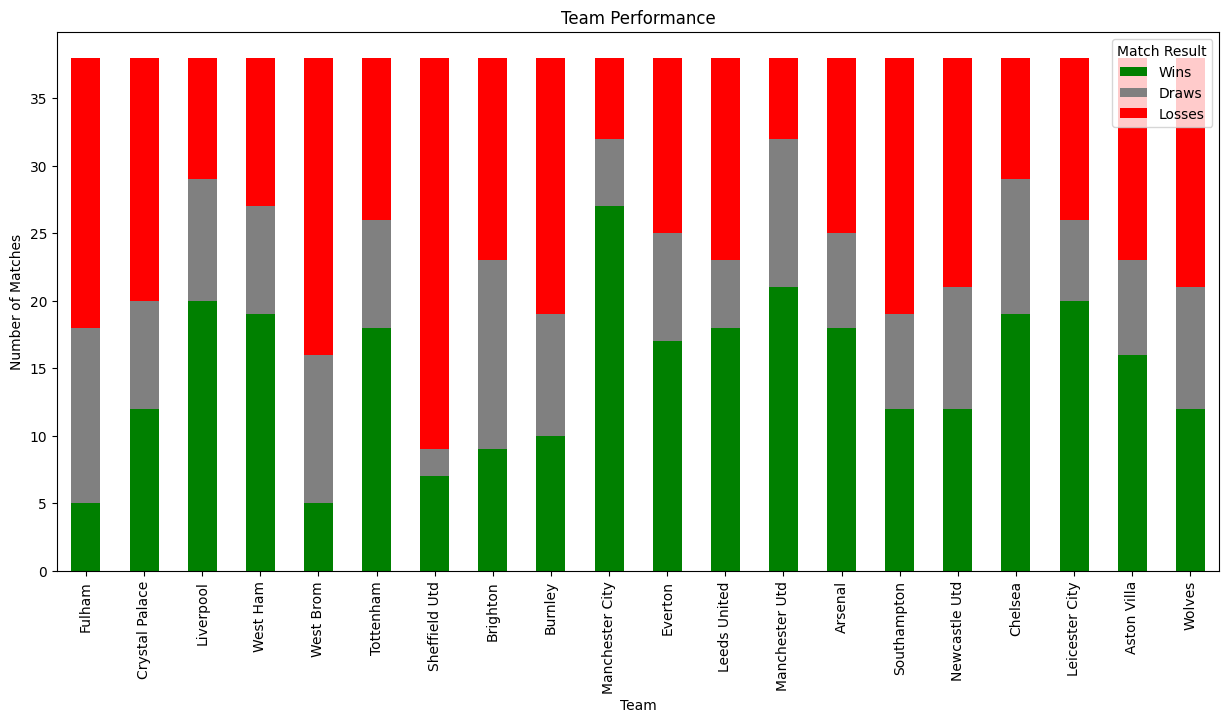

In [55]:
# Function to determine the result of a match for a given team
def get_result(row, team):
    # Replace the special hyphen with a standard hyphen
    goals_home, goals_away = map(int, row['FT'].replace('–', '-').split('-'))
    if row['Team 1'] == team:
        if goals_home > goals_away:
            return 'Win'
        elif goals_home < goals_away:
            return 'Loss'
        else:
            return 'Draw'
    elif row['Team 2'] == team:
        if goals_home < goals_away:
            return 'Win'
        elif goals_home > goals_away:
            return 'Loss'
        else:
            return 'Draw'

# Get list of all teams
teams = pd.concat([data['Team 1'], data['Team 2']]).unique()

# Initialize a DataFrame to store results
results = pd.DataFrame(index=teams, columns=['Wins', 'Draws', 'Losses'], data=0)

# Calculate results for each team
for team in teams:
    results.loc[team, 'Wins'] = data.apply(lambda row: get_result(row, team) == 'Win', axis=1).sum()
    results.loc[team, 'Draws'] = data.apply(lambda row: get_result(row, team) == 'Draw', axis=1).sum()
    results.loc[team, 'Losses'] = data.apply(lambda row: get_result(row, team) == 'Loss', axis=1).sum()

# Plot team performance
results.plot(kind='bar', stacked=True, figsize=(15, 7), color=['green', 'gray', 'red'])
plt.title('Team Performance')
plt.xlabel('Team')
plt.ylabel('Number of Matches')
plt.xticks(rotation=90)
plt.legend(title='Match Result')
plt.show()


In [56]:
from sklearn.preprocessing import LabelEncoder
laenc = LabelEncoder()

data['Round'] = laenc.fit_transform(data['Round'])
data['Date'] = laenc.fit_transform(data['Date'])
data['Team 1'] = laenc.fit_transform(data['Team 1'])
data['FT'] = laenc.fit_transform(data['FT'])
data['Team 2'] = laenc.fit_transform(data['Team 2'])


In [57]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)


In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [60]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)


RandomForestClassifier(max_depth=2, random_state=0)

In [61]:
y_pred_RFC=clf.predict(X_test)

In [62]:
y_pred_logistic = classifier.predict(X_test)


In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred_logistic)
print("Logistic Regression")
print(cm)
print(accuracy_score(y_test, y_pred_logistic))
cm1 = confusion_matrix(y_test,y_pred_RFC)
print("Random Forest Classifier")
print(cm1)
print(accuracy_score(y_test,y_pred_RFC))

Logistic Regression
[[0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 4 0 0 0 1 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 3 0]
 [3 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0]
 [1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [1 0 0 0 0 2 0 0 1 0 0 1 0 0 0 0 2 0 1 0]
 [1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0]
 [0 3 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0]
 [1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1]
 [0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0]
 [1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0]
 [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0]
 [2 1 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0]]
0.010526315789473684
Random Forest Classifier
[[0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [64]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.DataFrame({
    'Round': [1, 1, 1, 1, 1],
    'Date': ['Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sun Sep 13 2020'],
    'Team 1': ['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom'],
    'FT': ['0–3', '1–0', '4–3', '0–2', '0–3'],
    'Team 2': ['Arsenal', 'Southampton', 'Leeds United', 'Newcastle Utd', 'Leicester City']
})

# Split 'FT' column into 'Team 1 Goals' and 'Team 2 Goals'
data[['Team 1 Goals', 'Team 2 Goals']] = data['FT'].str.split('–', expand=True).astype(int)
data.drop(columns=['FT', 'Date'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Team 1'] = label_encoder.fit_transform(data['Team 1'])
data['Team 2'] = label_encoder.fit_transform(data['Team 2'])

# Define target variable 'Result' (1 for win, 0 for draw, -1 for loss for 'Team 1')
data['Result'] = np.sign(data['Team 1 Goals'] - data['Team 2 Goals'])

# Define features (X) and target (y)
X = data[['Round', 'Team 1', 'Team 2', 'Team 1 Goals', 'Team 2 Goals']].values
y = data['Result'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression model with increased max_iter
logistic_classifier = LogisticRegression(random_state=0, max_iter=5000)
logistic_classifier.fit(X_train_scaled, y_train)

# Train random forest classifier
rf_classifier = RandomForestClassifier(max_depth=2, random_state=0)
rf_classifier.fit(X_train, y_train)

# Output models
logistic_classifier, rf_classifier


(LogisticRegression(max_iter=5000, random_state=0),
 RandomForestClassifier(max_depth=2, random_state=0))

In [67]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.DataFrame({
    'Round': [1, 1, 1, 1, 1],
    'Date': ['Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sat Sep 12 2020', 'Sun Sep 13 2020'],
    'Team 1': ['Fulham', 'Crystal Palace', 'Liverpool', 'West Ham', 'West Brom'],
    'FT': ['0–3', '1–0', '4–3', '0–2', '0–3'],
    'Team 2': ['Arsenal', 'Southampton', 'Leeds United', 'Newcastle Utd', 'Leicester City']
})

# Split 'FT' column into 'Team 1 Goals' and 'Team 2 Goals'
data[['Team 1 Goals', 'Team 2 Goals']] = data['FT'].str.split('–', expand=True).astype(int)
data.drop(columns=['FT', 'Date'], inplace=True)

# Encode categorical variables
label_encoder = LabelEncoder()
data['Team 1'] = label_encoder.fit_transform(data['Team 1'])
data['Team 2'] = label_encoder.fit_transform(data['Team 2'])

# Define target variable 'Result' (1 for win, 0 for draw, -1 for loss for 'Team 1')
data['Result'] = np.sign(data['Team 1 Goals'] - data['Team 2 Goals'])

# Define features (X) and target (y)
# Remove 'Team 1 Goals', and 'Team 2 Goals' from features as they were not used in training
X = data[['Round', 'Team 1', 'Team 2']].values
y = data['Result'].values

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Train random forest classifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

# Make predictions
y_pred_RFC = clf.predict(X_test)

y_pred_RFC

array([-1, -1])